# Ideal answers for GenomeChat using GFFUtils

In [ ]:
import pandas as pd
import numpy as np
import gffutils
import seaborn as sns
import matplotlib.pyplot as plt
db = gffutils.FeatureDB('annotation.db')

Question 1: How many genes and transcripts are on chromosome 3?

In [ ]:
genes_chr3 = sum(1 for feature in db.features_of_type('gene') if feature.seqid == '3')
transcripts_chr3 = sum(1 for feature in db.features_of_type('transcript') if feature.seqid == '3')
print(f"Genes on chromosome 3: {genes_chr3}")
print(f"Transcripts on chromosome 3: {transcripts_chr3}")

Genes on chromosome 3: 4161
Transcripts on chromosome 3: 23219


Question 2: How many protein-coding genes are on chromosome 12?

In [ ]:
genes_12 = (feature for feature in db.features_of_type('gene')
if feature.seqid == '12' and feature.attributes.get('gene_biotype', [''])[0] == 'protein_coding')
gene_protein_coding_12 = sum(1 for _ in genes_12)
print(f"Number of protein-coding genes on chromosome 12: {gene_protein_coding_12}")

Number of protein-coding genes on chromosome 12: 1040


Question 3: How many lncRNA genes are on chromosome 7?

In [ ]:
lncRNA_count = sum(1 for feature in db.features_of_type('gene')
if feature.seqid == '7' and feature.attributes.get('gene_biotype', [''])[0] == 'lncRNA')
print(f"Number of lncRNA genes on chromosome 7: {lncRNA_count}")

Number of lncRNA genes on chromosome 7: 1656


Question 4: How many pseudogenes are on the X chromosome?

In [ ]:
pseudogene_counts = {}
total_pseudogenes = 0

for feature in db.features_of_type('gene'):
    if feature.seqid == 'X':
        gene_biotype = feature.attributes.get('gene_biotype', [''])[0]
        if gene_biotype.endswith('_pseudogene'):
            pseudogene_counts[gene_biotype] = pseudogene_counts.get(gene_biotype, 0) + 1
            total_pseudogenes += 1

print("Pseudogene subtypes on the X chromosome:")
for pseudogene_type in sorted(pseudogene_counts.keys()):
    count = pseudogene_counts[pseudogene_type]
    print(f"{pseudogene_type}: {count}")

print(f"\nTotal number of pseudogenes on the X chromosome: {total_pseudogenes}")

Pseudogene subtypes on the X chromosome:
processed_pseudogene: 674
rRNA_pseudogene: 20
transcribed_processed_pseudogene: 43
transcribed_unitary_pseudogene: 5
transcribed_unprocessed_pseudogene: 42
unitary_pseudogene: 5
unprocessed_pseudogene: 99

Total number of pseudogenes on the X chromosome: 888


Question 5: How many genes for miRNA exist in chromosome 10?

In [ ]:
miRNA_count = sum(1 for feature in db.features_of_type('gene')
if feature.seqid == '10' and feature.attributes.get('gene_biotype', [''])[0] == 'miRNA')
print(f"Number of miRNA genes on chromosome 10: {miRNA_count}")

Number of miRNA genes on chromosome 10: 69


Question 6: Calculate the sizes of each gene locus separately: XIST, MALAT1, BRCA1, COL1A2, NFKB1, NFKB2, REL, RELA and RELB

In [ ]:
genes_list = ["XIST", "MALAT1", "BRCA1", "COL1A2", "NFKB1", "NFKB2", "REL", "RELA", "RELB"]
for gene_name in genes_list:
    genes = db.features_of_type('gene', order_by='start')
    gene_found = False
    for gene in genes:
        if gene_name in gene.attributes.get('gene_name', []):
            size = gene.end - gene.start + 1
            print(f"{gene_name} size: {size} bp")
            gene_found = True
            break
    if not gene_found:
        print(f"Gene {gene_name} not found in the database")

XIST size: 32075 bp
MALAT1 size: 10468 bp
BRCA1 size: 125951 bp
COL1A2 size: 36333 bp
NFKB1 size: 115973 bp
NFKB2 size: 8415 bp
REL size: 50122 bp
RELA size: 9492 bp
RELB size: 36732 bp


Question 7: How many transcript isoforms does the XIST gene have? Print the transcript isoform names (transcript_name) and the sizes of each.

In [ ]:
xist_transcripts = (feature for feature in db.features_of_type('transcript') if 'XIST' in feature.attributes.get('gene_name', []))
counts = 0

for transcript in xist_transcripts:
    counts = counts + 1
    print(f"Transcript name: {transcript.attributes['transcript_name'][0]}, Size: {transcript.end - transcript.start + 1} bp")

print(f"\n\nThe XIST gene has {counts} transcript isoforms" )

Transcript name: XIST-230, Size: 22885 bp
Transcript name: XIST-206, Size: 30443 bp
Transcript name: XIST-225, Size: 30942 bp
Transcript name: XIST-201, Size: 6237 bp
Transcript name: XIST-203, Size: 21243 bp
Transcript name: XIST-202, Size: 5646 bp
Transcript name: XIST-229, Size: 6141 bp
Transcript name: XIST-216, Size: 9986 bp
Transcript name: XIST-204, Size: 32068 bp
Transcript name: XIST-212, Size: 18202 bp
Transcript name: XIST-213, Size: 20803 bp
Transcript name: XIST-223, Size: 25587 bp
Transcript name: XIST-215, Size: 23506 bp
Transcript name: XIST-224, Size: 21968 bp
Transcript name: XIST-222, Size: 26234 bp
Transcript name: XIST-211, Size: 29777 bp
Transcript name: XIST-226, Size: 30976 bp
Transcript name: XIST-218, Size: 30035 bp
Transcript name: XIST-221, Size: 6355 bp
Transcript name: XIST-219, Size: 20733 bp
Transcript name: XIST-214, Size: 6028 bp
Transcript name: XIST-217, Size: 15681 bp
Transcript name: XIST-220, Size: 5042 bp
Transcript name: XIST-227, Size: 15502 bp

Question 9: How many exons does the XIST gene have?

In [ ]:
exons = (feature for feature in db.features_of_type('exon') if 'XIST' in feature.attributes.get('gene_name', []))
exon_set = set(exon.attributes['exon_id'][0] for exon in exons if 'exon_id' in exon.attributes)
print(len(exon_set))

73


Question 10: How many exons does each transcript isoform of the BRCA1 gene have? Print the transcript isoform names (tr anscript_name) and the number of exons.

In [ ]:
brca1_exon_counts = {}
for feature in db.features_of_type('exon'):
    gene_name = feature.attributes.get('gene_name', [''])[0]
    if gene_name == 'BRCA1':
        transcript_name = feature.attributes.get('transcript_name', [''])[0]
        brca1_exon_counts[transcript_name] = brca1_exon_counts.get(transcript_name, 0) + 1

for transcript_name, exon_count in brca1_exon_counts.items():
    print(f"{transcript_name}: {exon_count}")

BRCA1-222: 15
BRCA1-216: 22
BRCA1-214: 23
BRCA1-203: 23
BRCA1-211: 21
BRCA1-213: 22
BRCA1-201: 22
BRCA1-220: 22
BRCA1-221: 23
BRCA1-209: 24
BRCA1-232: 24
BRCA1-228: 21
BRCA1-212: 23
BRCA1-233: 3
BRCA1-208: 23
BRCA1-241: 23
BRCA1-226: 23
BRCA1-205: 23
BRCA1-231: 24
BRCA1-207: 22
BRCA1-234: 2
BRCA1-230: 24
BRCA1-215: 21
BRCA1-223: 8
BRCA1-224: 11
BRCA1-225: 5
BRCA1-219: 22
BRCA1-204: 23
BRCA1-217: 23
BRCA1-210: 2
BRCA1-236: 14
BRCA1-227: 3
BRCA1-202: 10
BRCA1-237: 12
BRCA1-218: 11
BRCA1-229: 11
BRCA1-238: 6
BRCA1-206: 7
BRCA1-235: 2
BRCA1-239: 4
BRCA1-240: 3


Question 10.1: What is the average exon size of the BRCA1 transcript isoforms?

In [ ]:
# Get all exons for BRCA1
brca1_exons = list(feature for feature in db.features_of_type('exon')
                   if 'BRCA1' in feature.attributes.get('gene_name', []))

# Calculate total exon size and count
total_exon_size = sum(feature.end - feature.start + 1 for feature in brca1_exons)
num_brca1_exons = len(brca1_exons)

# Calculate average exon size
if num_brca1_exons > 0:
    average_exon_size = total_exon_size / num_brca1_exons
    print(f"Average exon size of BRCA1 transcript isoforms: {average_exon_size:.2f} bp")
else:
    print("No exons found for BRCA1")

Average exon size of BRCA1 transcript isoforms: 251.83 bp


Question 11: What is the chromosomal position of the BRCA1 gene?

In [ ]:
for feature in db.features_of_type('gene'):
    if 'BRCA1' in feature.attributes.get('gene_name', []):
        print(f"Chromosomal position of BRCA1: {feature.start}-{feature.end}")
        break

Chromosomal position of BRCA1: 43044295-43170245


Question 12: On which chromosomes are the genes NFKB1, NFKB2, REL, RELA and RELB located?

In [ ]:
target_genes = ['NFKB1', 'NFKB2', 'REL', 'RELA', 'RELB']

for feature in db.features_of_type('gene'):
    gene_name = feature.attributes.get('gene_name', [''])[0]
    if gene_name in target_genes:
        print(f"{gene_name}: chromosome {feature.seqid}")

REL: chromosome 2
NFKB1: chromosome 4
RELA: chromosome 11
NFKB2: chromosome 10
RELB: chromosome 19


Question 13: Print the names of the 2 genes located immediately before and after the gene COL1A2, respectively

In [ ]:
# Find the COL1A2 gene
col1a2 = next(filter(lambda x: x.attributes.get('gene_name', [''])[0] == 'COL1A2',
                     db.features_of_type('gene')))

# Get the chromosome and strand of COL1A2
chromosome = col1a2.seqid
strand = col1a2.strand

# Find the gene immediately before COL1A2
gene_before = next(filter(lambda x: x.seqid == chromosome and x.end < col1a2.start,
                          sorted(db.features_of_type('gene'), key=lambda x: -x.end)))

# Find the gene immediately after COL1A2
gene_after = next(filter(lambda x: x.seqid == chromosome and x.start > col1a2.end,
                         sorted(db.features_of_type('gene'), key=lambda x: x.start)))

# Function to get gene info
def get_gene_info(gene):
    gene_id = gene.attributes.get('gene_id', ['Unknown'])[0]
    gene_name = gene.attributes.get('gene_name', ['Unknown'])[0]
    return f"{gene_name} (ID: {gene_id})"

# Print the results
print(f"{get_gene_info(col1a2)}")
print(f"Gene before COL1A2: {get_gene_info(gene_before)}")
print(f"Gene after COL1A2: {get_gene_info(gene_after)}")

COL1A2 (ID: ENSG00000164692)
Gene before COL1A2: Unknown (ID: ENSG00000285964)
Gene after COL1A2: Unknown (ID: ENSG00000309657)


Question 14: What is the biotype of the following genes XIST, MALAT1, BRCA1,NFKB1, NFKB2, REL, RELA, RELB and COL1A2?

In [ ]:
for gene_name in ['XIST', 'MALAT1', 'BRCA1', 'NFKB1', 'NFKB2', 'REL', 'RELA', 'RELB', 'COL1A2']:
    genes = db.features_of_type('gene')
    for gene in genes:
        if gene_name in gene.attributes.get('gene_name', []):
            biotype = gene.attributes.get('gene_biotype', [''])[0]
            print(f"{gene_name}: {biotype}")

XIST: lncRNA
MALAT1: lncRNA
BRCA1: protein_coding
NFKB1: protein_coding
NFKB2: protein_coding
REL: protein_coding
RELA: protein_coding
RELB: protein_coding
COL1A2: protein_coding


Question 15: What strand are the HOTAIR, HOXC11, and HOXC12 genes located on?

In [ ]:
for feature in db.features_of_type('gene'):
    if feature.attributes.get('gene_name', [''])[0] == 'HOTAIR':
        print(f"HOTAIR strand: {feature.strand}")
    if feature.attributes.get('gene_name', [''])[0] == 'HOXC11':
        print(f"HOXC11 strand: {feature.strand}")
    if feature.attributes.get('gene_name', [''])[0] == 'HOXC12':
        print(f"HOXC12 strand: {feature.strand}")

HOXC12 strand: +
HOXC11 strand: +
HOTAIR strand: -


Question 16: Which genes are located between the HOXC11 and HOXC12 genes on + and - strands?

In [ ]:
# Find HOXC11 and HOXC12 genes
hoxc11 = next(gene for gene in db.features_of_type('gene') if gene.attributes.get('gene_name', [''])[0] == 'HOXC11')
hoxc12 = next(gene for gene in db.features_of_type('gene') if gene.attributes.get('gene_name', [''])[0] == 'HOXC12')

# Determine the region between HOXC11 and HOXC12
start = min(hoxc11.start, hoxc12.start)
end = max(hoxc11.end, hoxc12.end)
chromosome = hoxc11.seqid  # Assuming both genes are on the same chromosome

# Find genes between HOXC11 and HOXC12
genes_between = []
for gene in db.features_of_type('gene'):
    if (gene.seqid == chromosome and
        start < gene.start < end and
        gene.id not in [hoxc11.id, hoxc12.id]):
        gene_id = gene.id
        gene_name = gene.attributes.get('gene_name', [''])[0]
        gene_strand = gene.strand
        genes_between.append((gene_id, gene_name, gene_strand))

# Print the results
print("Genes between HOXC11 and HOXC12:")
for gene_id, gene_name, gene_strand in genes_between:
    if gene_name:
        print(f"Gene ID: {gene_id}, Gene Name: {gene_name}, Strand: {gene_strand}")
    else:
        print(f"Gene ID: {gene_id}, Strand: {gene_strand}")

Genes between HOXC11 and HOXC12:
Gene ID: ENSG00000275589, Strand: +
Gene ID: ENSG00000277994, Strand: +
Gene ID: ENSG00000274817, Strand: +
Gene ID: ENSG00000277129, Strand: +
Gene ID: ENSG00000293681, Strand: -
Gene ID: ENSG00000228630, Gene Name: HOTAIR, Strand: -


Question 17: Get the following informations about each transcript isoforms of the XIST, MALAT1, BRCA1, NFKB1, COL1A2, HOTAIR, HOXC11, and HOXC12 genes: chromosomal location and position, size, number of exons, average exon size, strand, and biotype. Organize all the information in a table and save it.

In [ ]:
transcript_data = []
gene_names = ['XIST', 'MALAT1', 'BRCA1', 'NFKB1', 'COL1A2', 'HOTAIR', 'HOXC11', 'HOXC12']

for gene_name in gene_names:
    # Find the gene
    genes = list(db.features_of_type('gene'))
    gene = next((g for g in genes if g.attributes.get('gene_name', [''])[0] == gene_name), None)

    if gene is None:
        print(f"Gene {gene_name} not found in the database.")
        continue

    # Get all transcripts for this gene
    for transcript in db.children(gene, featuretype='transcript'):
        # Get exons for this transcript
        exons = list(db.children(transcript, featuretype='exon'))
        num_exons = len(exons)

        if num_exons > 0:
            total_exon_size = sum(exon.end - exon.start + 1 for exon in exons)
            avg_exon_size = total_exon_size / num_exons
        else:
            avg_exon_size = 0

        transcript_data.append({
            'Transcript Name': transcript.attributes.get('transcript_name', [transcript.id])[0],
            'Transcript ID': transcript.id,
            'Chromosomal Location': transcript.seqid,
            'Position': f"{transcript.start} - {transcript.end}",
            'Size': transcript.end - transcript.start + 1,
            'Number of Exons': num_exons,
            'Average Exon Size': round(avg_exon_size, 2),
            'Strand': transcript.strand,
            'Biotype': transcript.attributes.get('transcript_biotype', ['Unknown'])[0]
        })

df = pd.DataFrame(transcript_data)

# Display the DataFrame in the notebook
df

,Transcript Name,Transcript ID,Chromosomal Location,Position,Size,Number of Exons,Average Exon Size,Strand,Biotype
0,XIST-201,ENST00000416330,X,73820653 - 73826889,6237,4,227.00,-,lncRNA
1,XIST-202,ENST00000417942,X,73820656 - 73826301,5646,3,241.33,-,lncRNA
2,XIST-203,ENST00000421322,X,73820653 - 73841895,21243,7,387.43,-,lncRNA
3,XIST-204,ENST00000429829,X,73820656 - 73852723,32068,6,3207.50,-,lncRNA
4,XIST-205,ENST00000433732,X,73827601 - 73829470,1870,3,194.33,-,lncRNA
...,...,...,...,...,...,...,...,...,...
195,HOTAIR-213,ENST00000774202,12,53962315 - 53974634,12320,7,207.29,-,lncRNA
196,HOTAIR-214,ENST00000774203,12,53966121 - 53967379,1259,2,184.00,-,lncRNA
197,HOXC11-201,ENST00000243082,12,53973128 - 53976419,3292,2,1019.50,+,protein_coding
198,HOXC11-202,ENST00000546378,12,53973126 - 53977643,4518,2,1630.50,+,protein_coding


Question 18: Generate a scatterplot to represent the distribution of gene sizes in the X chromosome.

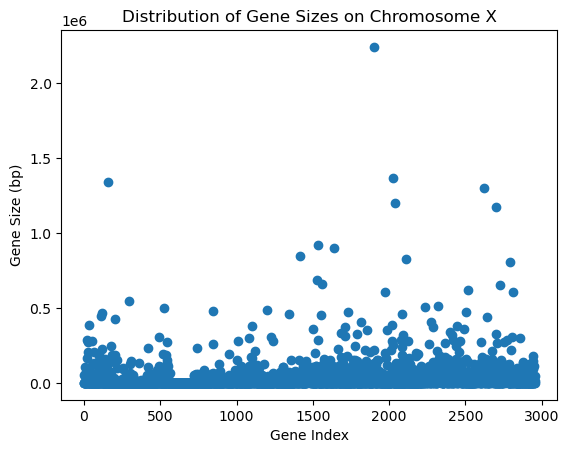

In [ ]:
import matplotlib.pyplot as plt
gene_sizes = []

for feature in db.features_of_type('gene'):
    if feature.seqid == 'X':
        gene_sizes.append(feature.end - feature.start + 1)

plt.scatter(range(len(gene_sizes)), gene_sizes)
plt.xlabel('Gene Index')
plt.ylabel('Gene Size (bp)')
plt.title('Distribution of Gene Sizes on Chromosome X')
plt.show()

Question 19: Generate a stacked barplot chart to represent the proportions of protein-coding, lncRNA and miRNA genes on each chromosome separately.

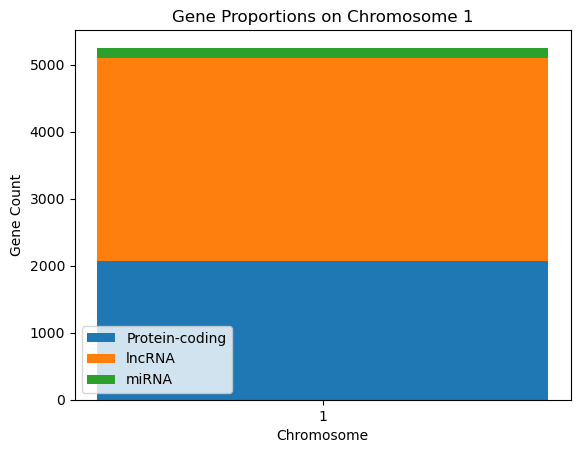

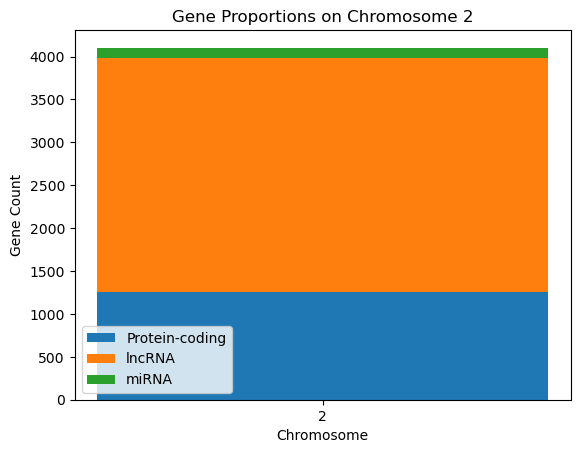

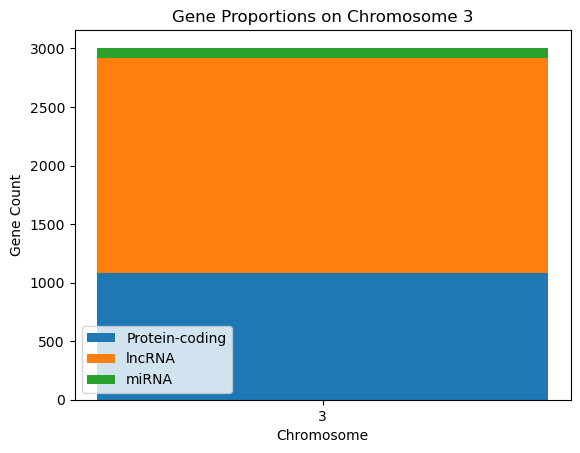

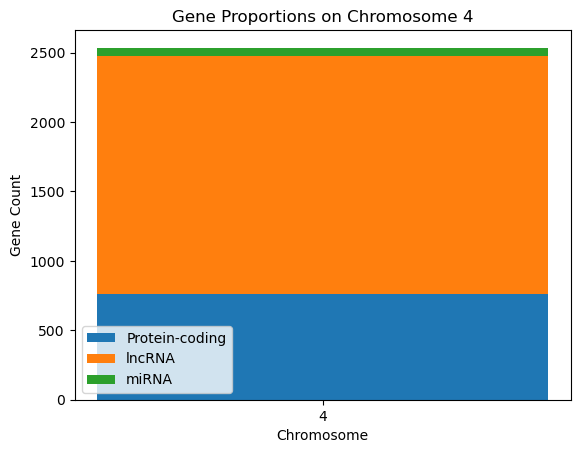

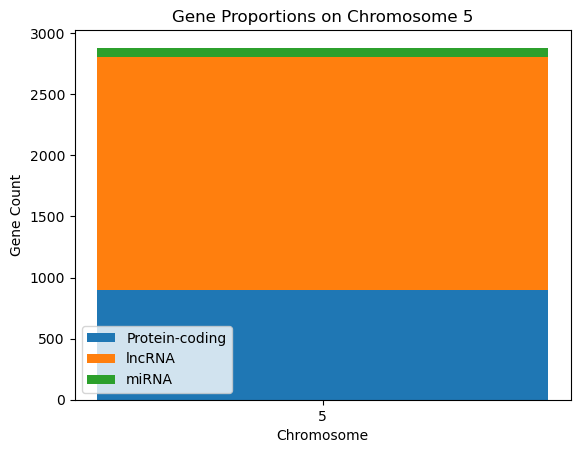

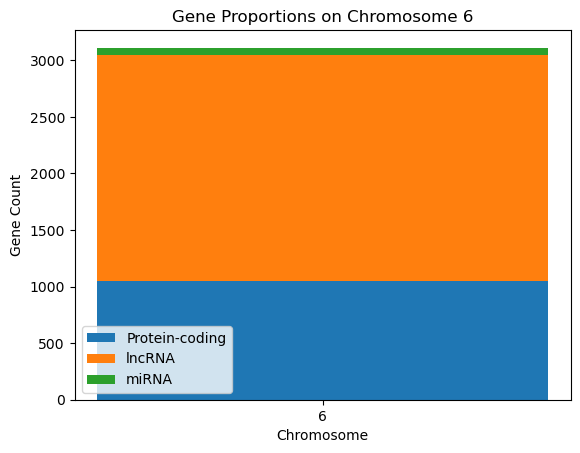

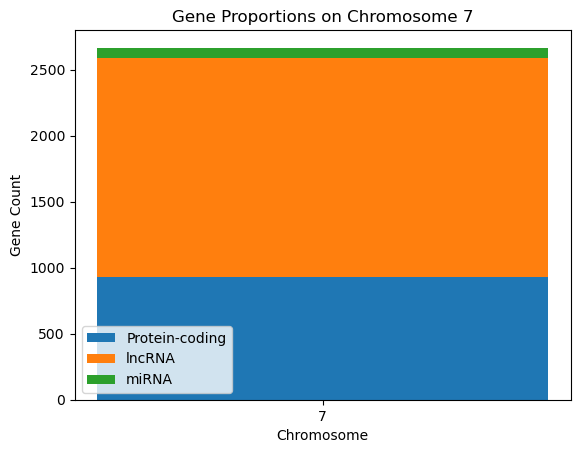

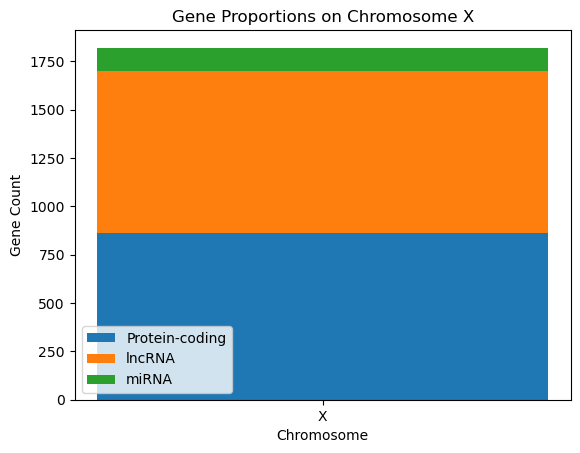

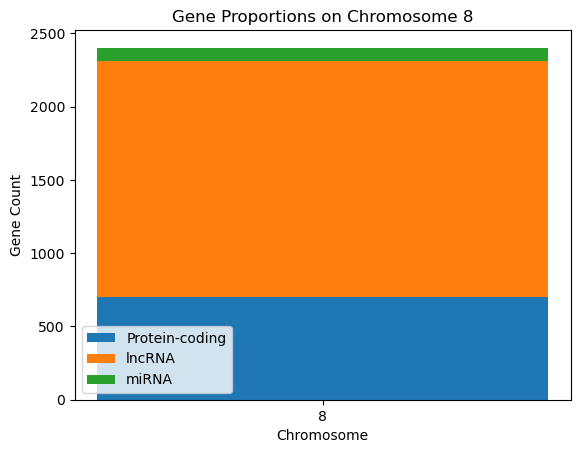

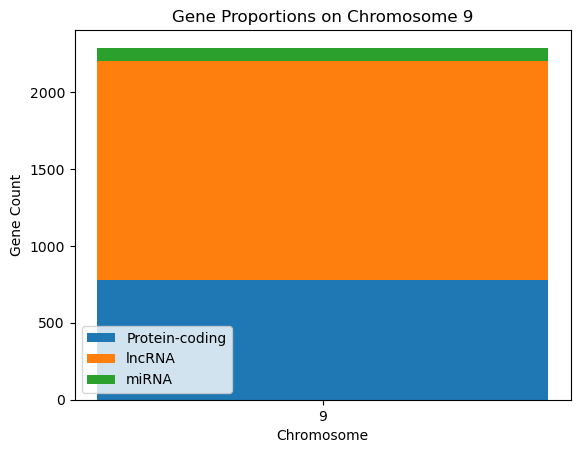

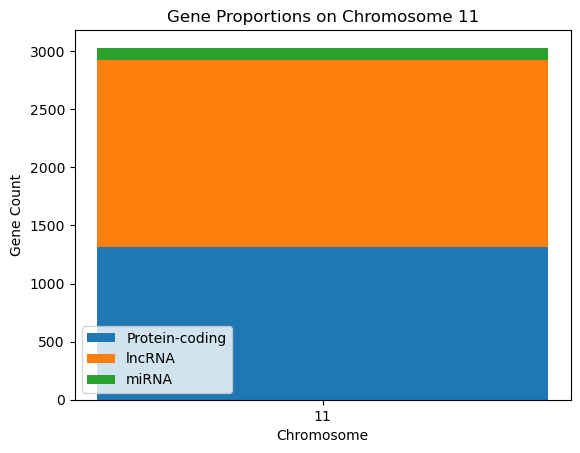

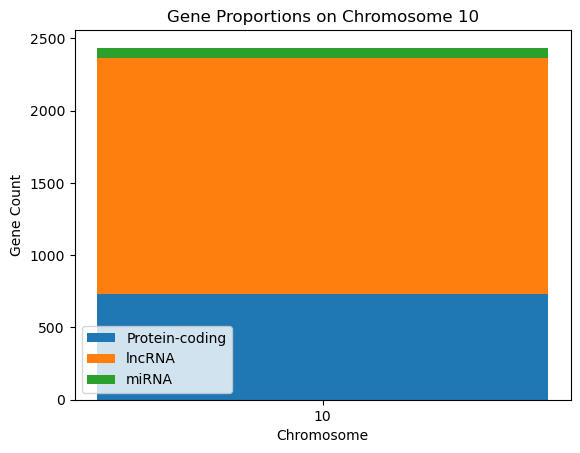

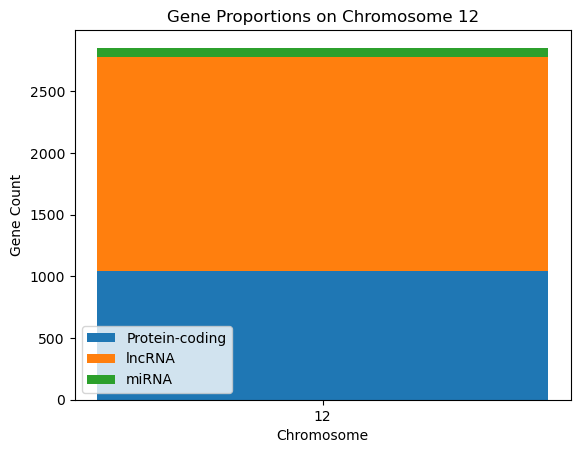

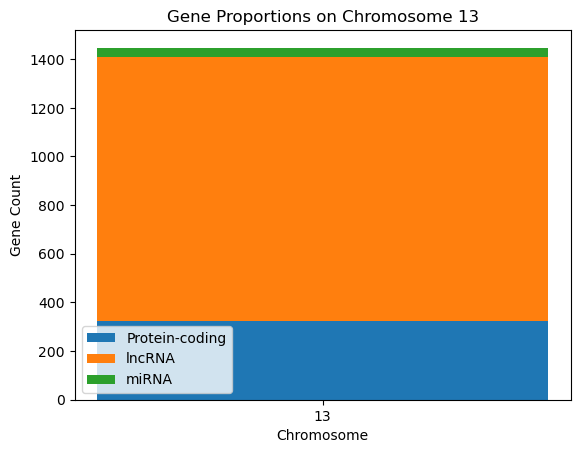

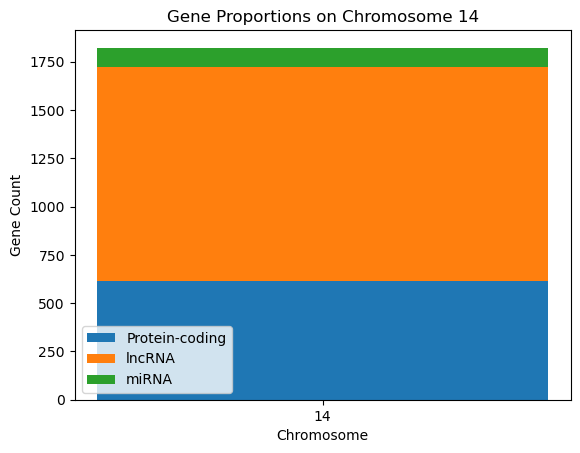

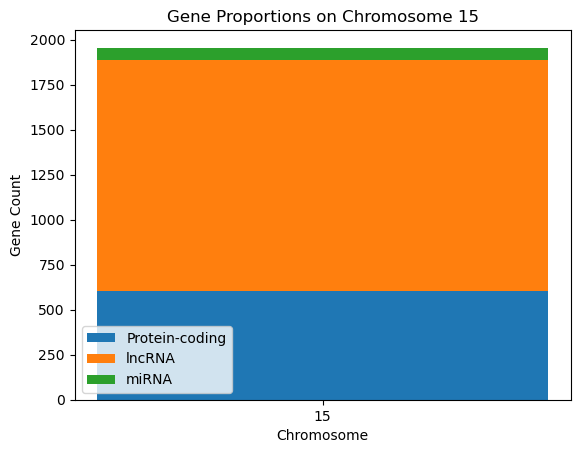

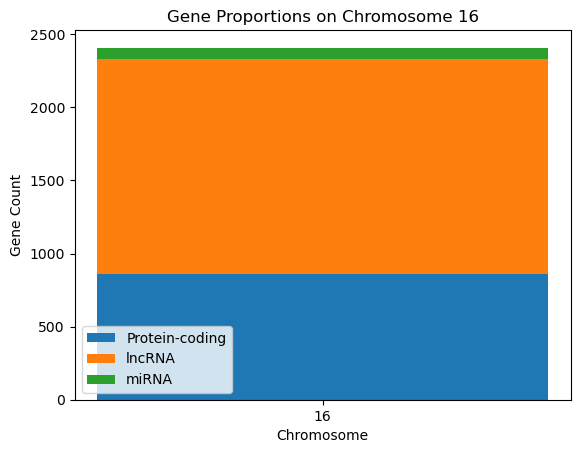

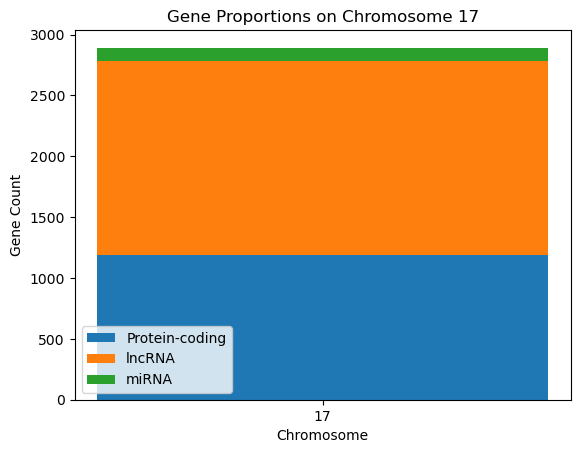

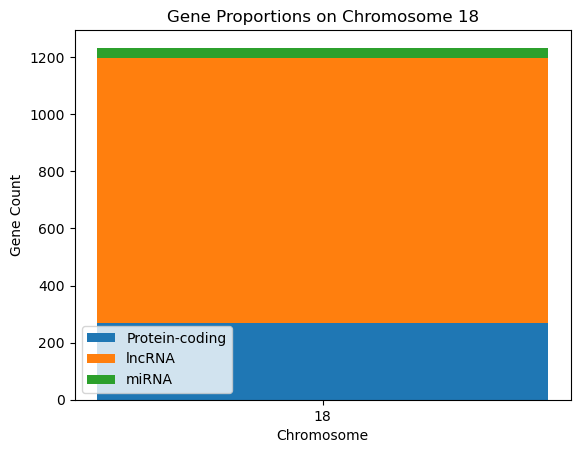

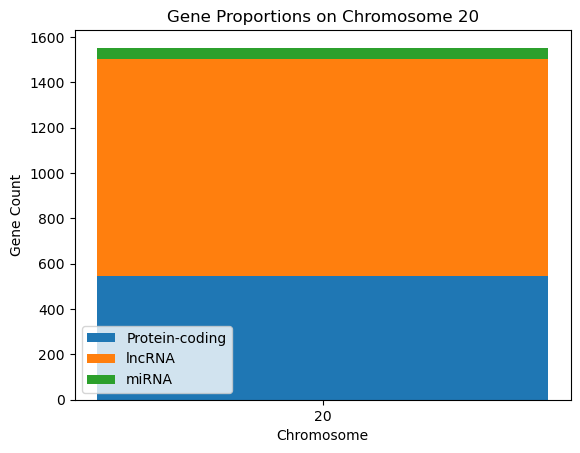

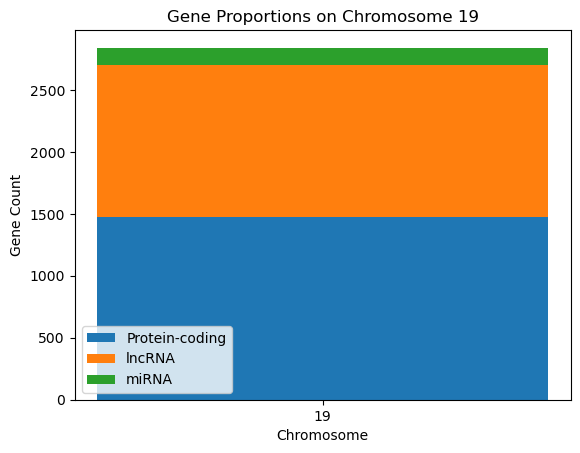

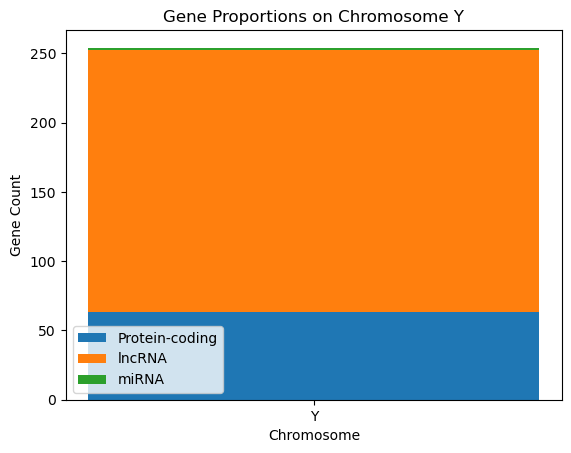

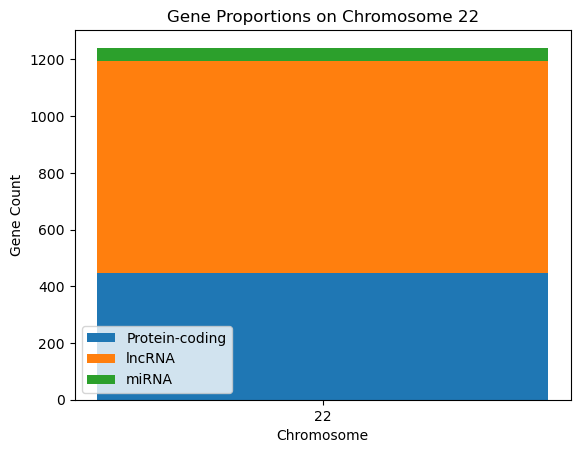

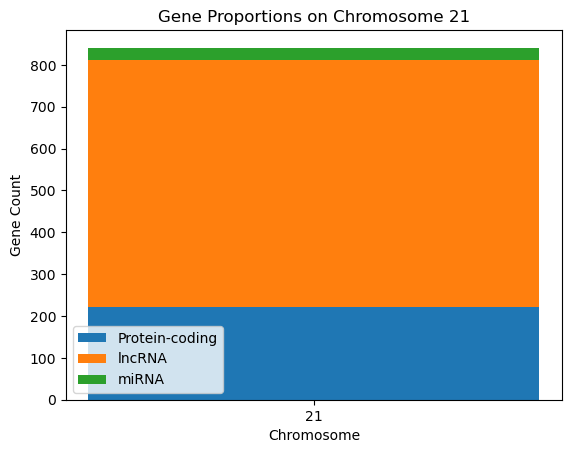

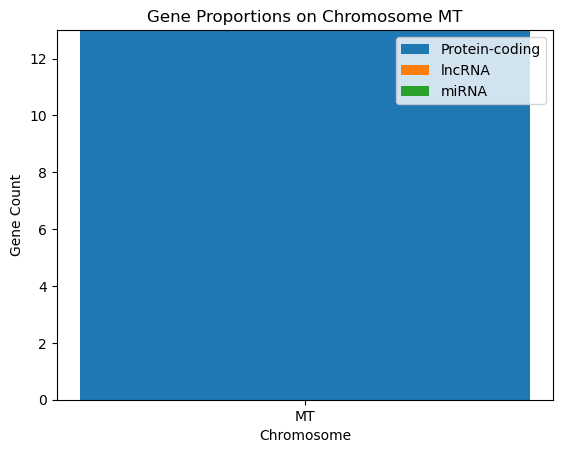

In [ ]:
import matplotlib.pyplot as plt
chromosome_data = {}
for feature in db.features_of_type('gene'):
    seqid = feature.seqid
    gene_biotype = feature.attributes.get('gene_biotype', [''])[0]
    if seqid not in chromosome_data:
        chromosome_data[seqid] = {'protein_coding': 0, 'lncRNA': 0, 'miRNA': 0}
    if gene_biotype == 'protein_coding':
        chromosome_data[seqid]['protein_coding'] += 1
    elif gene_biotype == 'lncRNA':
        chromosome_data[seqid]['lncRNA'] += 1
    elif gene_biotype == 'miRNA':
        chromosome_data[seqid]['miRNA'] += 1

for chromosome, counts in chromosome_data.items():
    plt.bar(chromosome, counts['protein_coding'], label='Protein-coding')
    plt.bar(chromosome, counts['lncRNA'], bottom=counts['protein_coding'], label='lncRNA')
    plt.bar(chromosome, counts['miRNA'], bottom=counts['protein_coding'] + counts['lncRNA'], label='miRNA')
    plt.xlabel('Chromosome')
    plt.ylabel('Gene Count')
    plt.title(f'Gene Proportions on Chromosome {chromosome}')
    plt.legend()
    plt.show()

Question 20: Generate a boxplot to represent the comparison of protein_coding, lncRNA, and miRNA transcript sizes

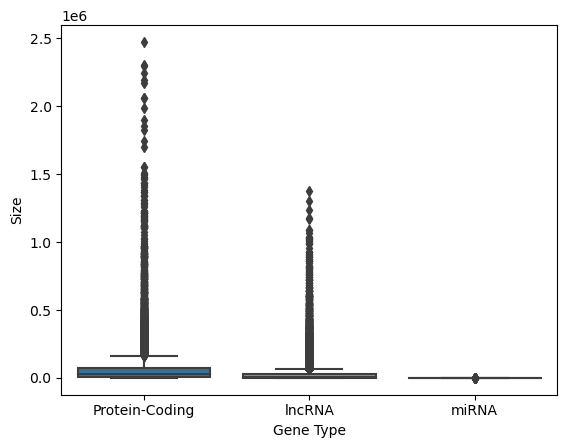

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = []
for feature in db.features_of_type('gene'):
    if feature.attributes.get('gene_biotype', [''])[0] == 'protein_coding':
        data.append((feature.end - feature.start + 1, 'Protein-Coding'))
    elif feature.attributes.get('gene_biotype', [''])[0] == 'lncRNA':
        data.append((feature.end - feature.start + 1, 'lncRNA'))
    elif feature.attributes.get('gene_biotype', [''])[0] == 'miRNA':
        data.append((feature.end - feature.start + 1, 'miRNA'))

df = pd.DataFrame(data, columns=['Size', 'Gene Type'])
sns.boxplot(x='Gene Type', y='Size', data=df)
plt.show()